**PROJECT: TELCO CUSTOMER CHURN ANALYSIS**

**Import Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data Exploration**

In [4]:
# load the Dataset
customer_churn_df = pd.read_excel('src/Telco_customer_churn.xlsx')
customer_churn_df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
customer_churn_df.columns = customer_churn_df.columns.str.replace(' ', '_')

**Dataset Overview**

**1. What is the total number of rows and columns in the dataset?**

In [6]:
customer_churn_df.shape

(7043, 33)

- There are **33** columns and **7043** rows(entries) in this dataset.

**2. What are the data types of each column?**

In [7]:
customer_churn_df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip_Code               int64
Lat_Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Label           object
Churn_Value            int64
Churn_Score            int64
CLTV                   int64
Churn_Reason          object
dtype: object

**3. Which columns are categorical, numerical, or binary?**

In [8]:
numerical_columns = customer_churn_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Columns:\n", numerical_columns)

categorical_columns = customer_churn_df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Columns:\n", categorical_columns)

binary_columns = [col for col in customer_churn_df.columns if customer_churn_df[col].nunique() == 2]
print("\nBinary Columns:\n", binary_columns)

Numerical Columns:
 ['Count', 'Zip_Code', 'Latitude', 'Longitude', 'Tenure_Months', 'Monthly_Charges', 'Churn_Value', 'Churn_Score', 'CLTV']

Categorical Columns:
 ['CustomerID', 'Country', 'State', 'City', 'Lat_Long', 'Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method', 'Total_Charges', 'Churn_Label', 'Churn_Reason']

Binary Columns:
 ['Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Phone_Service', 'Paperless_Billing', 'Churn_Label', 'Churn_Value']


**4. Are there irrelevant columns (e.g., customerID) that should be dropped?**

In [9]:
if "CustomerID" in customer_churn_df.columns:
    print("\nIrrelevant column detected: CustomerID (likely to drop).")


Irrelevant column detected: CustomerID (likely to drop).


**5. How many unique values are there in each categorical variable?**

In [10]:
unique_counts_cat = customer_churn_df[categorical_columns].nunique().sort_values(ascending=False)
print("Unique Value Counts for Categorical Columns:\n",unique_counts_cat)

Unique Value Counts for Categorical Columns:
 CustomerID           7043
Total_Charges        6531
Lat_Long             1652
City                 1129
Churn_Reason           20
Payment_Method          4
Internet_Service        3
Device_Protection       3
Streaming_Movies        3
Contract                3
Tech_Support            3
Streaming_TV            3
Online_Backup           3
Multiple_Lines          3
Online_Security         3
Gender                  2
Phone_Service           2
Dependents              2
Partner                 2
Senior_Citizen          2
Paperless_Billing       2
Churn_Label             2
Country                 1
State                   1
dtype: int64


**Data Quality Checks**

**1. Are there missing values in any column?**

In [11]:
print("\nMissing Values in Each Column:")
customer_churn_df.isnull().sum()


Missing Values in Each Column:


CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip_Code                0
Lat_Long                0
Latitude                0
Longitude               0
Gender                  0
Senior_Citizen          0
Partner                 0
Dependents              0
Tenure_Months           0
Phone_Service           0
Multiple_Lines          0
Internet_Service        0
Online_Security         0
Online_Backup           0
Device_Protection       0
Tech_Support            0
Streaming_TV            0
Streaming_Movies        0
Contract                0
Paperless_Billing       0
Payment_Method          0
Monthly_Charges         0
Total_Charges           0
Churn_Label             0
Churn_Value             0
Churn_Score             0
CLTV                    0
Churn_Reason         5174
dtype: int64

- There are **5174** missing values out of **7043** entries in **Churn_Reason** column.

**2. Are there blank spaces stored as empty strings?**

In [12]:
blank_counts = (customer_churn_df.astype(str).apply(lambda x: x.str.strip().eq('').sum()))
print("\nBlank Values in Each Column:\n", blank_counts[blank_counts > 0])


Blank Values in Each Column:
 Total_Charges    11
dtype: int64


- Only **Total_Charges** column has **11** blank spaces stored as empty strings.

**3. Does TotalCharges contain non-numeric values?**

In [13]:
# checking column type
print("\nData Type of 'Total Charges':", customer_churn_df['Total_Charges'].dtype)

# converting to numeric
customer_churn_df['TotalCharges_numeric'] = pd.to_numeric(customer_churn_df['Total_Charges'], errors='coerce')

# Reporting how many values failed conversion
n_coerced = customer_churn_df['TotalCharges_numeric'].isna().sum()
print(f"Non-numeric/missing after conversion: {n_coerced}")

# If any coercion happened, display them
if n_coerced > 0:
    print("\nProblematic values:")
    print(customer_churn_df.loc[customer_churn_df['TotalCharges_numeric'].isna(), 'Total_Charges'].unique())


Data Type of 'Total Charges': object
Non-numeric/missing after conversion: 11

Problematic values:
[' ']


- Yes. **Total_Charges** column contains **11** non-numeric entries, which are stored as **blank spaces (' ')**.

**4. Are there duplicate customerID entries?**

In [14]:
dup_cust_id_count = customer_churn_df['CustomerID'].duplicated().sum()
print("Number of duplicate CustomerID entries:", dup_cust_id_count)

Number of duplicate CustomerID entries: 0


- No, there are **0** duplicate entries in CustomerID col.

**5. Is TotalCharges approximately equal to MonthlyCharges × tenure? (Sanity Check)**

In [15]:
customer_churn_df['calc_total'] = customer_churn_df['Monthly_Charges'] * customer_churn_df['Tenure_Months']
customer_churn_df['total_diff'] = (customer_churn_df["TotalCharges_numeric"] - customer_churn_df['calc_total']).abs()

print("Distribution of Differences:")
customer_churn_df['total_diff'].describe()


Distribution of Differences:


count    7032.000000
mean       45.089157
std        49.899711
min         0.000000
25%         9.437500
50%        28.650000
75%        63.700000
max       373.250000
Name: total_diff, dtype: float64

- **Sanity Check:**
I compared Total_Charges with Monthly_Charges × Tenure_Months. The values are **approximately related but not exactly equal**. The **average difference** is about **45 units**, with **most customers showing differences under 64 units**. This indicates that while Total_Charges is generally proportional to Monthly_Charges and Tenure_Months, it may also include other billing adjustments (e.g., taxes, partial months, or additional services).

**Data Cleaning and Preparation**

In [16]:
# handling TotalCharges_numeric NaNs

customer_churn_df['TotalCharges_numeric'] = customer_churn_df['TotalCharges_numeric'].fillna(0) # filling with 0, bcz these customers haven't paid any bill yet (new customer)
print("\nCheck non-numeric values again: ", customer_churn_df['TotalCharges_numeric'].isna().sum())


# handling Churn_Reason col missing values

customer_churn_df['Churn_Reason'] = customer_churn_df['Churn_Reason'].fillna("Not Applicable") # missing for customers whose churn=0
print("\nCheck Missing values in Churn_Reason again: ",customer_churn_df['Churn_Reason'].isnull().sum())

# dropping CustomerID - unique identifier, useless for ml

customer_churn_df = customer_churn_df.drop(columns=['CustomerID'])
print("\nCheck columns: ", customer_churn_df.columns.tolist())

# check duplicates

print("\nDuplicate rows:", customer_churn_df.duplicated().sum())



Check non-numeric values again:  0

Check Missing values in Churn_Reason again:  0

Check columns:  ['Count', 'Country', 'State', 'City', 'Zip_Code', 'Lat_Long', 'Latitude', 'Longitude', 'Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method', 'Monthly_Charges', 'Total_Charges', 'Churn_Label', 'Churn_Value', 'Churn_Score', 'CLTV', 'Churn_Reason', 'TotalCharges_numeric', 'calc_total', 'total_diff']

Duplicate rows: 0


**After Data Cleaning**

- **No non-numeric** values remain in **TotalCharges_numeric**. Missing entries were filled with **0**, as these customers are new and have not paid any bills yet.
- **No missing values** are left in **Churn_Reason**. The missing entries were replaced with **"Not Applicable"**, since customers who have not churned naturally do not have a churn reason.
- **CustomerID** column was **dropped** because it is just an identifier and does not provide any useful information for analysis or machine learning models.
- **No duplicate rows** were found in the dataset.

**Target Variable Analysis**

**1. What is the churn rate (%)?**


Churn Counts:
 Churn_Label
No     5174
Yes    1869
Name: count, dtype: int64

Churn Rate: 26.54%


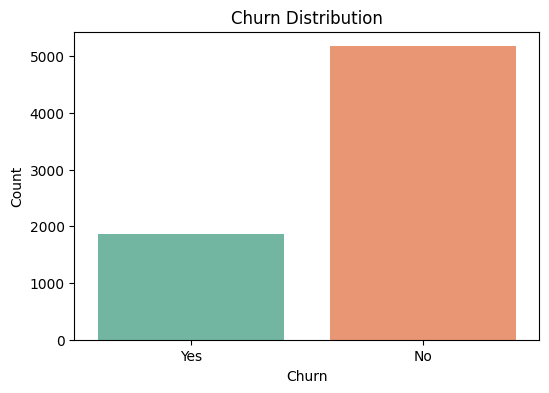

In [17]:
churn_counts = customer_churn_df['Churn_Label'].value_counts()
churn_rate = churn_counts['Yes'] / churn_counts.sum() * 100

print("\nChurn Counts:\n", churn_counts)
print(f"\nChurn Rate: {churn_rate:.2f}%")

# Distribution of Churn (Yes/No)
plt.figure(figsize=(6,4))
sns.countplot(data=customer_churn_df, x='Churn_Label', hue='Churn_Label',palette='Set2',legend=False)
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


**2. Is the target variable (Churn) balanced or imbalanced?**

In [18]:
if churn_rate < 30:
    balance_status = "Imbalanced (fewer churned customers)"
elif churn_rate > 70:
    balance_status = "Imbalanced (most customers churned)"
else:
    balance_status = "Fairly Balanced"
    
print(f"\nBalance Status: {balance_status}")


Balance Status: Imbalanced (fewer churned customers)


**3. Which churn value is more frequent?**

In [19]:
most_frequent_churn_value = customer_churn_df['Churn_Label'].mode()[0]
print("Most Frequent (mode):", most_frequent_churn_value)

Most Frequent (mode): No


- Churn Rate = 26.54%
- Imbalanced - (Yes = 26.5%, No = 73.5%)
- Most frequent Value = No

**Univariate Analysis**

**1.1. Distribution of Tenure**

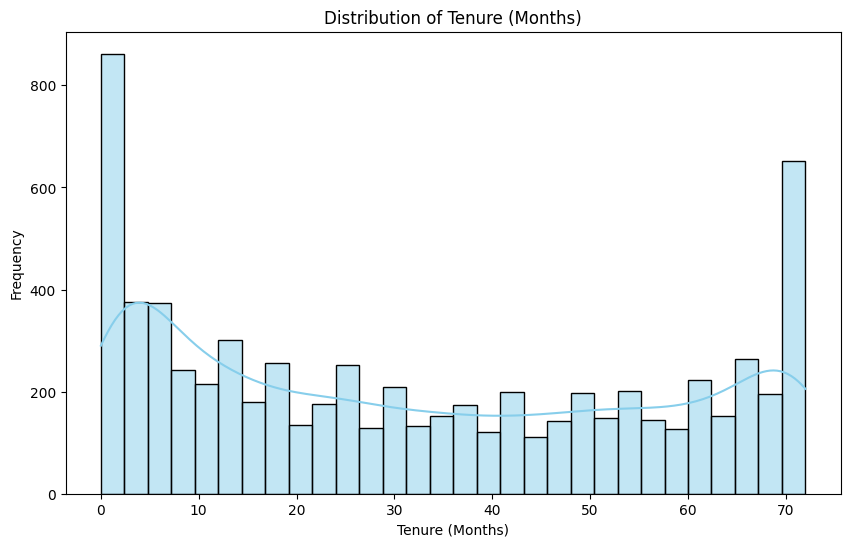

In [22]:
# Distribution of Tenure 

plt.figure(figsize=(10, 6))
sns.histplot(customer_churn_df['Tenure_Months'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Tenure (Months)")
plt.xlabel("Tenure (Months)")
plt.ylabel("Frequency")
plt.show()

**Observations:**

- **High at 0–1 months:** Many new customers join but churn early.
- **Drop at 10–50 months:** Fewer mid-tenure customers → people either leave early or stay long-term.
- **High at 60–72 months:** Strong base of loyal, long-term subscribers.
- **Bimodal distribution:** Two clear groups → short-term churners vs. long-term loyal users.

**Insights**

> Early churn is a major issue → retention weak in the first few months.

> Customers who stay past the early phase are likely to remain long-term.

> Focus on **onboarding, engagement, and value delivery in the first 3–6 months**.

> Leverage existing **loyal customers** as a business strength.

**1.2. Distribution of Monthly_Charges**

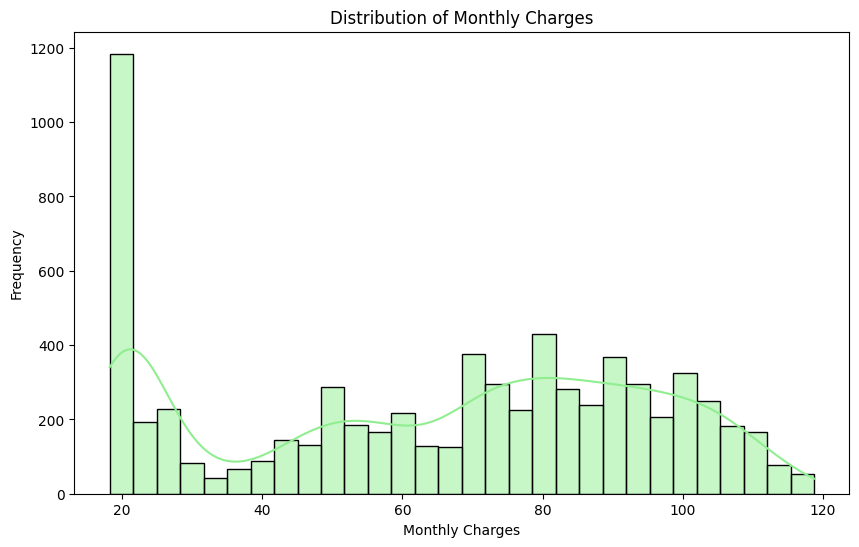

In [24]:
# Distribution of Monthly Charges

plt.figure(figsize=(10, 6))
sns.histplot(customer_churn_df['Monthly_Charges'], bins=30, kde=True, color='lightgreen')
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()

**Observations:**

- **Spike at ~$20:** Majority of customers are on low-cost/basic plans.
- **Spread between $40–$100:** Customers distributed across mid-tier plans.
- **Decline after $100:** Few customers on premium/high-value plans.
- **Skewed distribution:** Revenue base leans toward low-paying customers.

**Insights**

> Revenue largely depends on a **big pool of low-paying customers**.

> Presence of mid-to-high tier customers offers **growth potential**.

> Business should focus on **upselling low-paying users** to higher tiers while **retaining premium customers** for sustained revenue growth.

> Pricing strategy should balance **affordability vs. premium value**.

**1.3. Distribution of Total Charges**

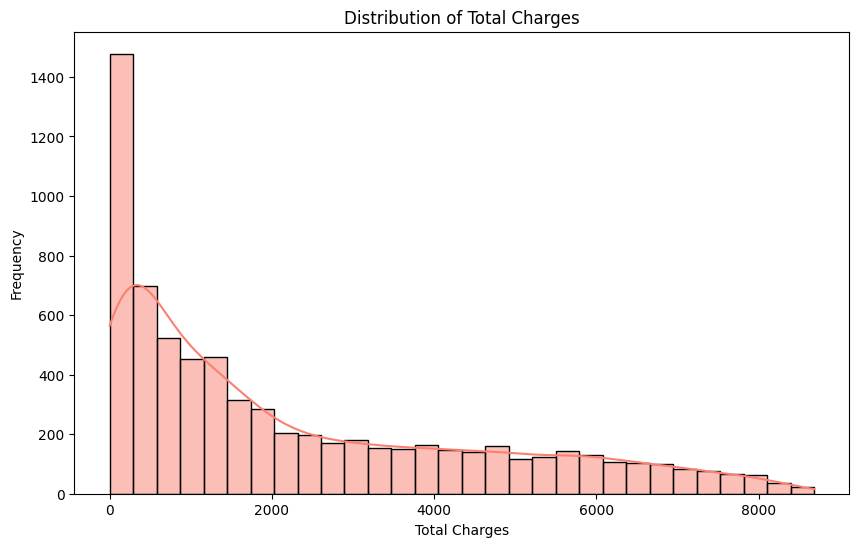

In [25]:
# Distribution of Total Charges

plt.figure(figsize=(10, 6))
sns.histplot(customer_churn_df['TotalCharges_numeric'], bins=30, kde=True, color='salmon')
plt.title("Distribution of Total Charges")
plt.xlabel("Total Charges")
plt.ylabel("Frequency")
plt.show()

**Observations:**

- **High at low charges (~0):** Many customers churn early with minimal spend.
- **Declining trend with higher charges:** Fewer customers accumulate large total payments.
- **Long tail up to ~9000+:** A small group of loyal customers contributes very high lifetime revenue.

**Insights**

> Revenue is **skewed toward a few long-term, high-value customers**.

> Most customers churn before generating significant total revenue.

> Business sustainability depends on **retaining and growing lifetime value (LTV) customers**.

> Focus should be on **early retention + loyalty programs** to convert more customers into high-value contributors.


**2. Most Common Internet Service Type**


Internet Service Distribution:
 Internet_Service
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


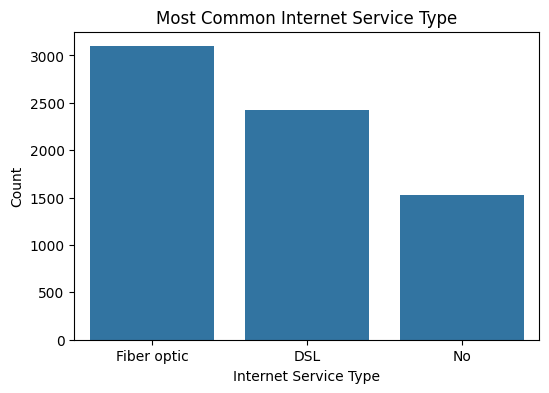

In [27]:
internet_service_distribution = customer_churn_df['Internet_Service'].value_counts()
print("\nInternet Service Distribution:\n", internet_service_distribution)

plt.figure(figsize=(6,4))
sns.countplot(x='Internet_Service', data=customer_churn_df, order=customer_churn_df['Internet_Service'].value_counts().index)
plt.title("Most Common Internet Service Type")
plt.xlabel("Internet Service Type")
plt.ylabel("Count")
plt.show()

**Observations:**

- **Fiber optic (3096 customers)** → Most common service type.
- **DSL (2421 customers)** → Second most common.
- **No internet service (1526 customers)** → Small segment without internet.

**Insights**

> **Fiber optic dominates** → Majority of customers use fiber-optic internet, meaning it is the company’s **core offering** and also the **main revenue driver**.

> Since fiber users are the largest group, their **satisfaction/retention directly impacts churn rates**.

> **DSL users** still form a significant base, but may represent **older or lower-speed plans** → potential **upsell opportunity** to fiber.

> The **“No internet” group** likely only uses phone/TV services. While smaller, they may represent **low-value customers** with lower churn risk (since fewer bundled services → less dissatisfaction).

**3. Most Popular Contract Type**


Contract Type Distribution:
 Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


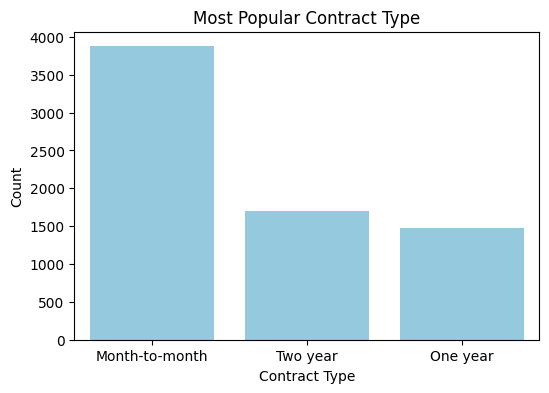

In [30]:
contract_distribution = customer_churn_df['Contract'].value_counts()
print("\nContract Type Distribution:\n", contract_distribution)

plt.figure(figsize=(6,4))
sns.countplot(x='Contract', data=customer_churn_df, order=customer_churn_df['Contract'].value_counts().index, color='skyblue')
plt.title("Most Popular Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()

**Observations:**

- **Month-to-month** → 3875 (most popular)
- **Two year** → 1695
- **One year** → 1473

**Insights**

> **Month-to-month contracts dominate** → customers like flexibility but are **high churn risk**.

> **Yearly contracts (1 & 2 years)** are fewer but provide **stable, loyal revenue**.

> Business should **encourage month-to-month users to shift to long-term contracts** with discounts or perks.

**4. Most Used Payment Method**


Payment Method Distribution:
 Payment_Method
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


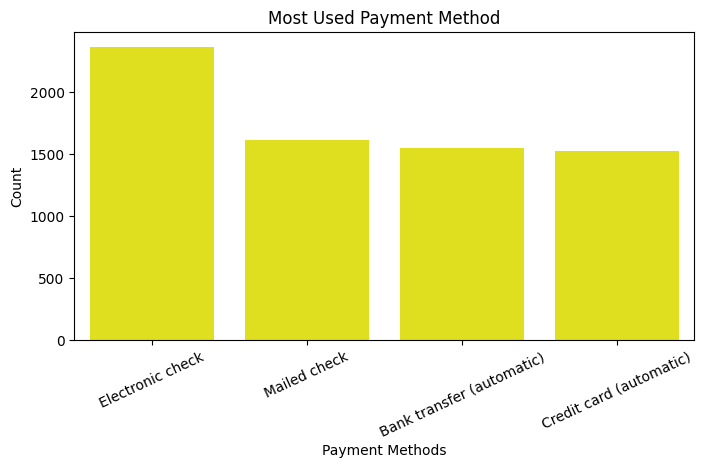

In [37]:
payment_method_distribution = customer_churn_df['Payment_Method'].value_counts()
print("\nPayment Method Distribution:\n", payment_method_distribution)

plt.figure(figsize=(8,4))
sns.countplot(x='Payment_Method', data=customer_churn_df, order=customer_churn_df['Payment_Method'].value_counts().index, color='yellow')
plt.title("Most Used Payment Method")
plt.xlabel("Payment Methods")
plt.ylabel("Count")
plt.xticks(rotation=25)
plt.show()

**Observations**

- **Electronic check** → 2365 (Most Used Payment Method)
- **Mailed check** → 1612
- **Bank transfer (auto)** → 1544
- **Credit card (auto)** → 1522

**Insights**

> **Most customers use electronic check** → convenient but risky, as they can stop anytime → **higher churn probability**.

> **Automatic payment methods** (credit card/bank transfer) indicate **loyal, committed customers** with lower churn.

> Business should **promote auto-pay methods** (discounts/rewards) → to lock in customers and reduce churn.

**5. Which service add-ons are most/least subscribed?**


Online_Security Distribution:
 Online_Security
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

Tech_Support Distribution:
 Tech_Support
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

Streaming_TV Distribution:
 Streaming_TV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

Streaming_Movies Distribution:
 Streaming_Movies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

Online_Backup Distribution:
 Online_Backup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

Device_Protection Distribution:
 Device_Protection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


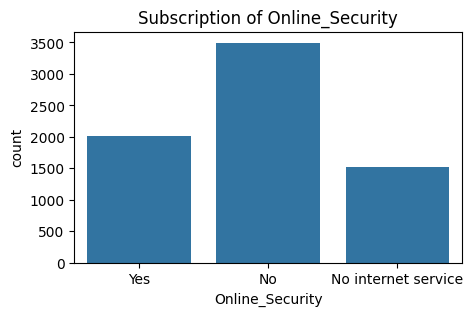

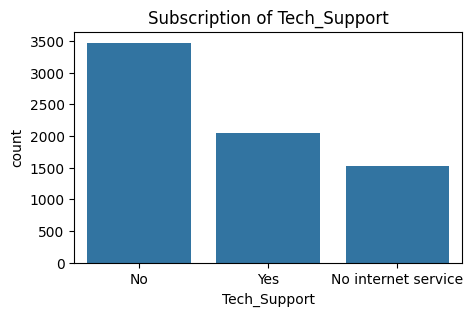

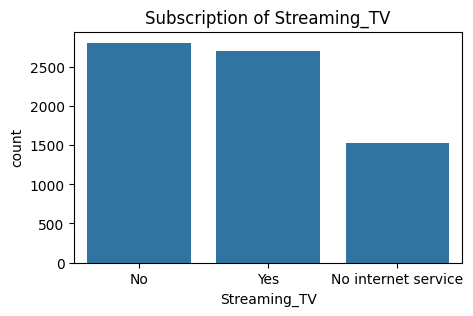

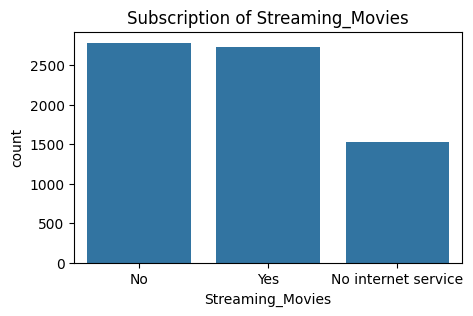

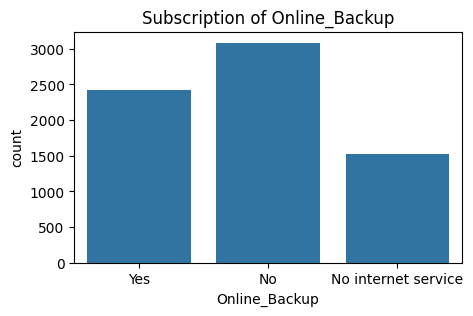

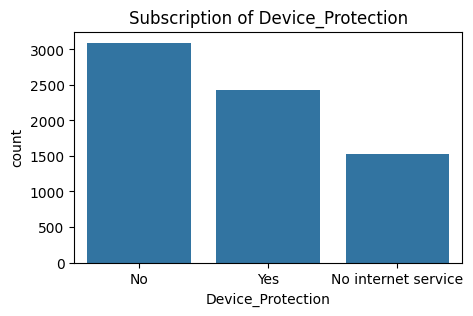

count    7043.000000
mean        2.037910
std         1.847682
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: bundle_depth, dtype: float64


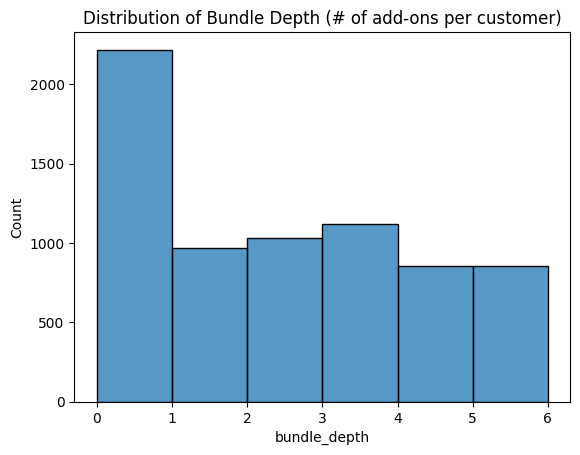

In [42]:
add_ons = ['Online_Security', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Online_Backup', 'Device_Protection']

for col in add_ons:
    add_ons_distribution = customer_churn_df[col].value_counts()
    print(f"\n{col} Distribution:\n", add_ons_distribution)
    
for col in add_ons:
    plt.figure(figsize=(5,3))
    sns.countplot(x=col, data=customer_churn_df)
    plt.title(f"Subscription of {col}")
    plt.show()

# Bundle depth
customer_churn_df['bundle_depth'] = customer_churn_df[add_ons].apply(lambda x: (x=='Yes').sum(), axis=1)
print(customer_churn_df['bundle_depth'].describe())

sns.histplot(customer_churn_df['bundle_depth'], bins=6, kde=False)
plt.title("Distribution of Bundle Depth (# of add-ons per customer)")
plt.show()

**Observations**

- **Streaming TV & Movies → Most subscribed (almost half of customers)**.
- **Online Backup & Device Protection** → Moderate adoption (~40–45%).
- **Online Security & Tech Support → Least subscribed (majority opted out)**.
- **No Internet group** → Consistently not eligible for add-ons.
- On average customers use **~2 add-ons (median = 2)**, but bundle depth ranges from **0 to 6**, showing **most stick to few add-ons** while only a small group subscribes to many.

**Insights**

> Customers **value entertainment add-ons** more than utility/security.

> **Streaming services drive engagement and revenue**.

> **Security & support add-ons need better marketing/bundling** to improve adoption.

> Opportunity: **bundle streaming + security** to increase ARPU and reduce churn.

**Bivariate Analysis**

**1. Churn rate by Contract type**


Churn Rate by Contract Type (%):
 Churn_Label            No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


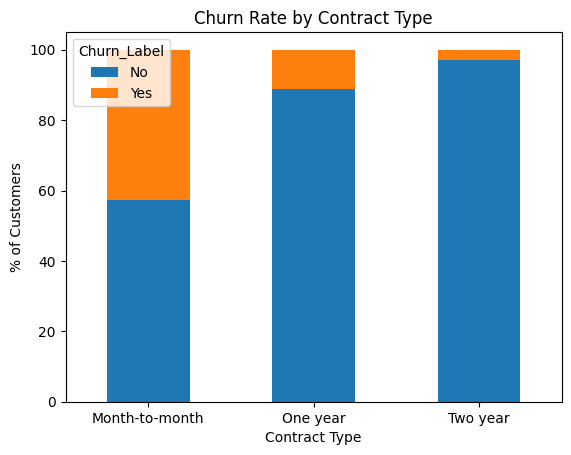

In [45]:
contract_churn = pd.crosstab(customer_churn_df['Contract'], customer_churn_df['Churn_Label'], normalize='index') * 100
print("\nChurn Rate by Contract Type (%):\n", contract_churn)

contract_churn.plot(kind='bar', stacked=True)
plt.title("Churn Rate by Contract Type")
plt.ylabel("% of Customers")
plt.xlabel("Contract Type")
plt.xticks(rotation=0)
plt.show()

**Observations + Insights**

- **Month-to-month contracts** → Highest churn **(~43%)** → very unstable group, major churn driver.  
- **One-year contracts** → Much lower churn **(~11%)** → customers more committed.  
- **Two-year contracts** → Lowest churn **(~3%)** → very loyal, provide stable revenue.  
- **Key takeaway:** **Longer contracts = lower churn** → company should incentivize **long-term signups** (discounts, perks, bundles).  


**2. Payment Method vs churn**

Payment Method Affect On Churn
Churn_Label                  No   Yes
Payment_Method                       
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308


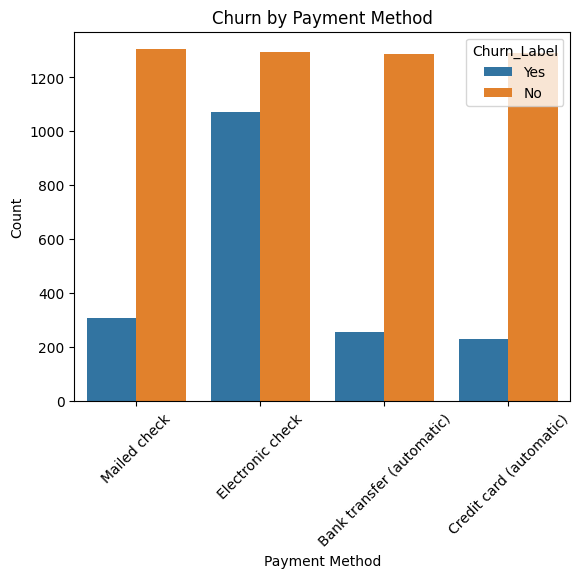

In [47]:
payment_vs_churn = pd.crosstab(customer_churn_df["Payment_Method"], customer_churn_df["Churn_Label"])
print("Payment Method Affect On Churn")
print(payment_vs_churn)

sns.countplot(x="Payment_Method", hue="Churn_Label", data=customer_churn_df)
plt.xticks(rotation=45)
plt.title("Churn by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()

**Observations + Insights**

- **Electronic check** → Highest churn (**~45%**) → customers paying manually are most likely to leave.  
- **Mailed check** → Lower churn (**~19%**) → more stable than electronic checks.  
- **Credit card (automatic)** → Low churn (**~15%**) → automatic payments increase loyalty.  
- **Bank transfer (automatic)** → Similar low churn (**~17%**) → stable, loyal customers.  
- **Key takeaway:** Automatic payment methods (**credit card, bank transfer**) are strongly linked to **lower churn** → business should encourage customers to switch to auto-pay options with perks or discounts.  


**3. Churn by Paperless Billing** 


Churn Rate by Paperless Billing (%):
 Churn_Label               No        Yes
Paperless_Billing                      
No                 83.669916  16.330084
Yes                66.434908  33.565092


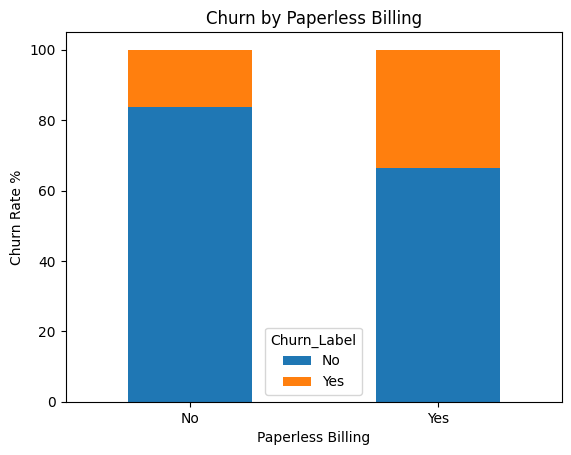

In [53]:
paperless = pd.crosstab(customer_churn_df['Paperless_Billing'], customer_churn_df['Churn_Label'], normalize='index')*100
print("\nChurn Rate by Paperless Billing (%):\n", paperless)

paperless.plot(kind='bar', stacked=True)
plt.title("Churn by Paperless Billing")
plt.ylabel("Churn Rate %")
plt.xlabel("Paperless Billing")
plt.xticks(rotation=0)
plt.show()

**Observations + Insights**

- **Without Paperless Billing (Paper bills)** → Churn **~16%** → very stable, loyal group.  
- **With Paperless Billing (Online bills)** → Churn **~34%** → almost double the churn rate.  
- **Key takeaway:** Paperless billing customers are **less committed and more churn-prone**, likely due to links with **month-to-month contracts**.  
- **Business should offset this risk** by pairing Paperless Billing with **auto-pay discounts or loyalty perks**.  

**4. Churn by Internet Service Type**


Churn Rate by Internet Service Type (%):
 Churn_Label              No        Yes
Internet_Service                      
DSL               81.040892  18.959108
Fiber optic       58.107235  41.892765
No                92.595020   7.404980


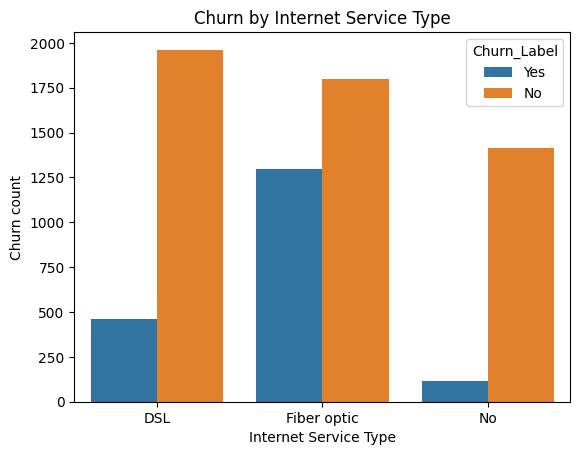

In [59]:
internet_service_vs_churn = pd.crosstab(customer_churn_df['Internet_Service'], customer_churn_df['Churn_Label'], normalize='index') * 100
print("\nChurn Rate by Internet Service Type (%):\n", internet_service_vs_churn)

sns.countplot(x="Internet_Service", hue="Churn_Label", data=customer_churn_df)
plt.title("Churn by Internet Service Type")
plt.xlabel("Internet Service Type")
plt.ylabel("Churn count")
plt.show()

**Observations + Insights**

- **DSL** → Churn **~19%** → relatively stable group, fewer switchers.  
- **Fiber optic** → Churn **~42%** → highest churn, nearly double DSL → major risk group.  
- **No internet service** → Churn **~7%** → very loyal group, least likely to leave.  
- **Key takeaway:** Fiber optic customers drive most churn → business should **improve service quality, pricing, and bundle offers** to retain them, while **leveraging DSL loyalty** and **upselling internet to “No service” users**.  

**5. Do customers with OnlineSecurity or TechSupport churn less?**


Churn Rate by Online Security (%):
 Churn_Label      Online_Security         No        Yes
0                             No  58.233276  41.766724
1            No internet service  92.595020   7.404980
2                            Yes  85.388806  14.611194

Churn Rate by Tech Support (%):
 Churn_Label         Tech_Support         No        Yes
0                             No  58.364526  41.635474
1            No internet service  92.595020   7.404980
2                            Yes  84.833659  15.166341


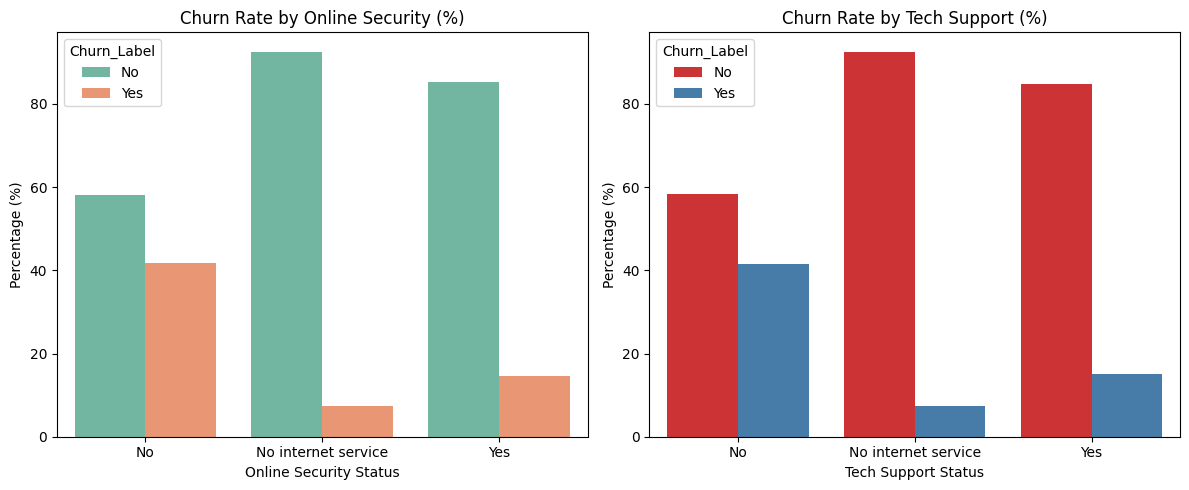

In [67]:
# Online Security - Calculate churn rate
online_security_rate = (
    pd.crosstab(customer_churn_df['Online_Security'], customer_churn_df['Churn_Label'], normalize='index') * 100
).reset_index()
print("\nChurn Rate by Online Security (%):\n", online_security_rate)

# Tech Support - Calculate churn rate
tech_support_rate = (
    pd.crosstab(customer_churn_df['Tech_Support'], customer_churn_df['Churn_Label'], normalize='index') * 100
).reset_index()
print("\nChurn Rate by Tech Support (%):\n", tech_support_rate)

fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Online Security Plot (%)
online_melted = online_security_rate.melt(id_vars="Online_Security", var_name="Churn_Label", value_name="Percent")
sns.barplot(data=online_melted, x="Online_Security", y="Percent", hue="Churn_Label", ax=ax[0], palette="Set2")
ax[0].set_title("Churn Rate by Online Security (%)")
ax[0].set_xlabel("Online Security Status")
ax[0].set_ylabel("Percentage (%)")

# Tech Support Plot (%)
tech_melted = tech_support_rate.melt(id_vars="Tech_Support", var_name="Churn_Label", value_name="Percent")
sns.barplot(data=tech_melted, x="Tech_Support", y="Percent", hue="Churn_Label", ax=ax[1], palette="Set1")
ax[1].set_title("Churn Rate by Tech Support (%)")
ax[1].set_xlabel("Tech Support Status")
ax[1].set_ylabel("Percentage (%)")

plt.tight_layout()
plt.show()


**Observations + Insights**

- **Earlier finding:** Online Security & Tech Support are **least subscribed add-ons** (most customers don’t use them).  
- **Current finding:** Customers **with these add-ons churn far less (~15%)** vs those without **(~42%)**.  
- **Interpretation:**  
  - These add-ons are **not popular**, but they are **powerful churn reducers**.  
  - Customers who take them become **stickier and more loyal**.  
- **Business opportunity:**  
  - Increase adoption via **bundling, discounts, or free trial offers**.  
  - Especially target **new customers** (most churn in early months).  
  - Position these add-ons as **“loyalty tools”** that protect customers and reduce switching.  


**6. How does MonthlyCharges differ between churned and retained customers?**


Monthly Charges Summary by Churn Status:
               count       mean        std    min    25%     50%   75%     max
Churn_Label                                                                  
No           5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75
Yes          1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35


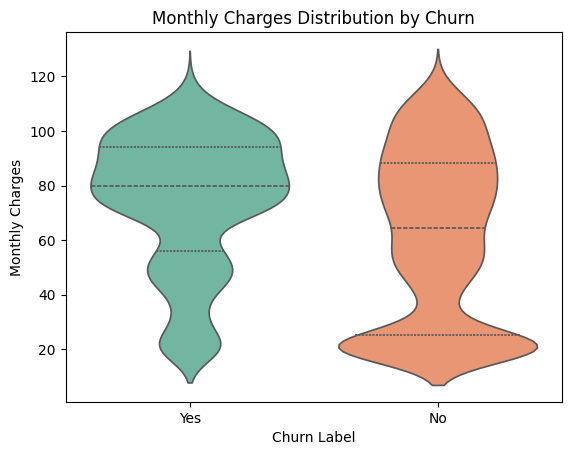

In [71]:
monthly_stats = customer_churn_df.groupby("Churn_Label")["Monthly_Charges"].describe()
print("\nMonthly Charges Summary by Churn Status:\n", monthly_stats)

sns.violinplot(
    x="Churn_Label",
    y="Monthly_Charges",
    data=customer_churn_df,
    hue= "Churn_Label",
    palette="Set2",
    inner="quartile",
    legend=False
)
plt.title("Monthly Charges Distribution by Churn")
plt.xlabel("Churn Label")
plt.ylabel("Monthly Charges")
plt.show()

**Observations + Insights**  

- **Retained (No churn):** Avg ≈ **$61**, Median ≈ **$64** → more low–mid range users.  
- **Churned (Yes churn):** Avg ≈ **$74**, Median ≈ **$80** → concentrated at higher charges.  
- **Key Insight:** Higher monthly charges → higher churn (price-sensitive customers).  
- **Business takeaway:** Reduce churn via **discounts, bundles, and clear value communication** for premium plans.  

**7. How does tenure differ between churned and retained customers?**


 Tenure Summary by Churn Status:
               count       mean        std  min   25%   50%   75%   max
Churn_Label                                                           
No           5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
Yes          1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0


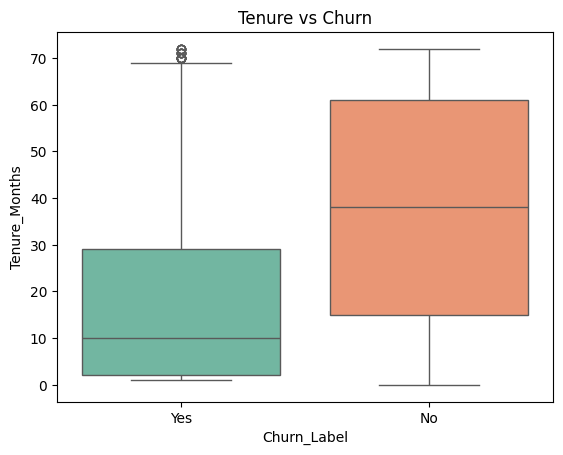

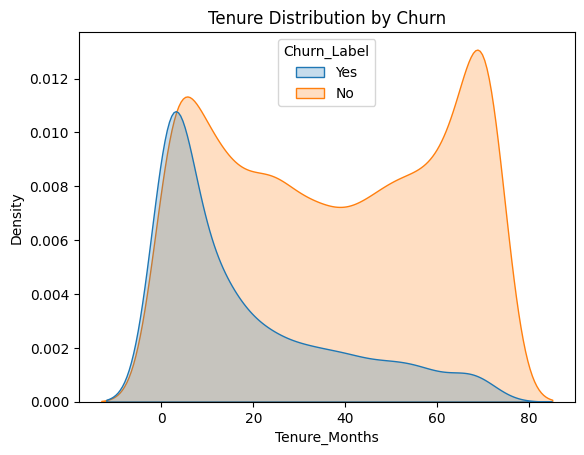

In [73]:
tenure_stats = customer_churn_df.groupby("Churn_Label")["Tenure_Months"].describe()
print("\n Tenure Summary by Churn Status:\n", tenure_stats)

# 📊 Boxplot
sns.boxplot(x="Churn_Label", y="Tenure_Months", data=customer_churn_df, palette="Set2", hue="Churn_Label", legend=False)
plt.title("Tenure vs Churn")
plt.show()

# 📊 KDE Plot
sns.kdeplot(data=customer_churn_df, x="Tenure_Months", hue="Churn_Label", fill=True)
plt.title("Tenure Distribution by Churn")
plt.show()

**Observations + Insights**

- **Retained (No churn):** Avg tenure ≈ **38 months**, Median ≈ **38** → longer stay (most 15–61 months).  
- **Churned (Yes churn):** Avg tenure ≈ **18 months**, Median ≈ **10** → shorter stay (most 2–29 months).  
- **From stats & plots:**  
  - Summary stats show **churners have much lower mean & median** than retained.  
  - Boxplot & KDE confirm churners cluster in **early months**, while retained spread into **longer durations**.  
- **Key Insight:** Churn risk is highest in the **first year**; customers surviving longer tend to stay loyal.  
- **Business takeaway:** Focus on **onboarding, early engagement, and value delivery** in first 12 months to cut churn.  


**8. Does senior citizen status affect churn?**


Churn Rate by Senior Citizen Status (%):
 Churn_Label            No        Yes
Senior_Citizen                      
No              76.393832  23.606168
Yes             58.318739  41.681261

Churn Count  by Senior Citizen Status:
 Churn_Label       No   Yes
Senior_Citizen            
No              4508  1393
Yes              666   476


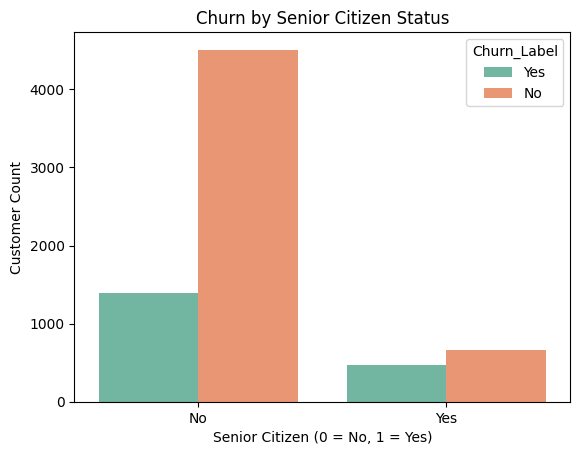

In [79]:
senior_citizen_churn_rate = pd.crosstab(customer_churn_df['Senior_Citizen'], customer_churn_df['Churn_Label'], normalize='index') * 100
print("\nChurn Rate by Senior Citizen Status (%):\n", senior_citizen_churn_rate)

senior_citizen_churn_count = pd.crosstab(customer_churn_df['Senior_Citizen'], customer_churn_df['Churn_Label']) 
print("\nChurn Count  by Senior Citizen Status:\n", senior_citizen_churn_count)

sns.countplot(x="Senior_Citizen", hue="Churn_Label", data=customer_churn_df, palette="Set2") 
plt.title("Churn by Senior Citizen Status") 
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)") 
plt.ylabel("Customer Count") 
plt.show()

**Observations + Insights**

- **Non-seniors (0):** 76% retained (**4508**), 24% churned (**1393**) → largest & relatively stable group.  
- **Seniors (1):** 58% retained (**666**), 42% churned (**476**) → smaller base but nearly **2× churn risk**.  
- **Key Insight:** Non-seniors = **majority, lower churn**; Seniors = **minority, higher churn**.  
- **Business takeaway:** Focus on **extra support/discounts for seniors**, while **engaging non-seniors** to maintain loyalty.   

**9. Does gender affect churn?**


Churn Rate by Gender (%)
 Churn_Label         No        Yes
Gender                           
Female       73.079128  26.920872
Male         73.839662  26.160338


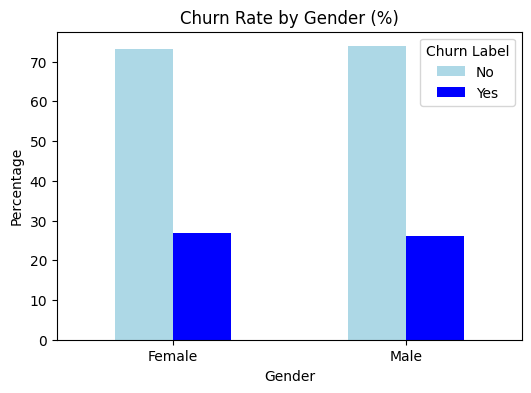

In [85]:
# Crosstab with percentages
churn_by_gender = pd.crosstab(
    customer_churn_df['Gender'], 
    customer_churn_df['Churn_Label'], 
    normalize='index'
) * 100

print("\nChurn Rate by Gender (%)\n", churn_by_gender)

# Plot using matplotlib directly
churn_by_gender.plot(
    kind="bar", 
    color=["lightblue", "blue"], 
    figsize=(6,4)
)

plt.title("Churn Rate by Gender (%)")
plt.ylabel("Percentage")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.legend(title="Churn Label")
plt.show()


**Observations + Insights**

- **Females:** 73% retained, 27% churned.  
- **Males:** 74% retained, 26% churned.  
- **Key Insight:** Churn rates are **almost identical** → gender has **no significant impact** on churn.  
- **Business takeaway:** Retention strategies should **not focus on gender**, but on other stronger churn drivers (contract type, payment method, tenure, etc.).  

**10. Do customers with dependents churn less?**


Churn Rate by Dependents (%)
 Churn_Label         No        Yes
Dependents                       
No           67.448301  32.551699
Yes          93.484942   6.515058


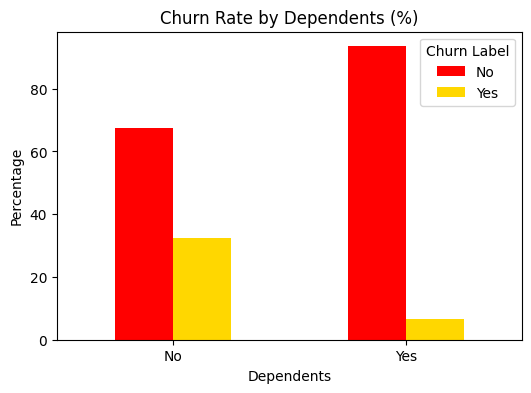

In [90]:
# Crosstab with percentages
churn_by_dependents = pd.crosstab(
    customer_churn_df['Dependents'], 
    customer_churn_df['Churn_Label'], 
    normalize='index'
) * 100

print("\nChurn Rate by Dependents (%)\n", churn_by_dependents)

# Plot using matplotlib directly
churn_by_dependents.plot(
    kind="bar", 
    color=["red", "gold"], 
    figsize=(6,4)
)

plt.title("Churn Rate by Dependents (%)")
plt.ylabel("Percentage")
plt.xlabel("Dependents")
plt.xticks(rotation=0)
plt.legend(title="Churn Label")
plt.show()


**Observations + Insights**

- **No dependents:** 67% retained, 33% churned → higher churn risk.  
- **With dependents:** 93% retained, 7% churned → very stable group.  
- **Key Insight:** Having dependents is strongly linked to **lower churn** (customers with families are more loyal).  
- **Business takeaway:** Focus retention on **single/independent customers** (no dependents), while nurturing loyal family customers with **family bundles & perks**.  